In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'C:/Users/asobchen/AppData/Local/Programs/Python/Python39/sum.xlsx'  # Update this path to where your file is located
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Unique list of stations for plotting
stations = data['Station'].unique()

# Loop through each station and create a bar plot
for station in stations:
    # Filter data for the specific station
    station_data = data[data['Station'] == station]
    
    # Set up the bar positions and width
    years = station_data['year']
    bar_width = 0.25
    positions = range(len(years))
    
    # Plot each category
    plt.figure(figsize=(10, 6))
    
    plt.bar([p - bar_width for p in positions], station_data['Without filling out gaps'], 
            width=bar_width, label='Without filling out gaps', color='blue')
    plt.bar(positions, station_data['After filling out gaps'], 
            width=bar_width, label='After filling out gaps', color='red')
    plt.bar([p + bar_width for p in positions], station_data['AESO'], 
            width=bar_width, label='IESO', color='green')
    
    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('MWh')
    plt.title(f'{station} Generation Comparison')
    plt.xticks(ticks=positions, labels=years)
    plt.legend()
    
    plt.savefig(f"{station}.png")

    # plt.tight_layout()
    # plt.show()


Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Ghost_Pine_seasonal_power_output_comparison_with_diff.png


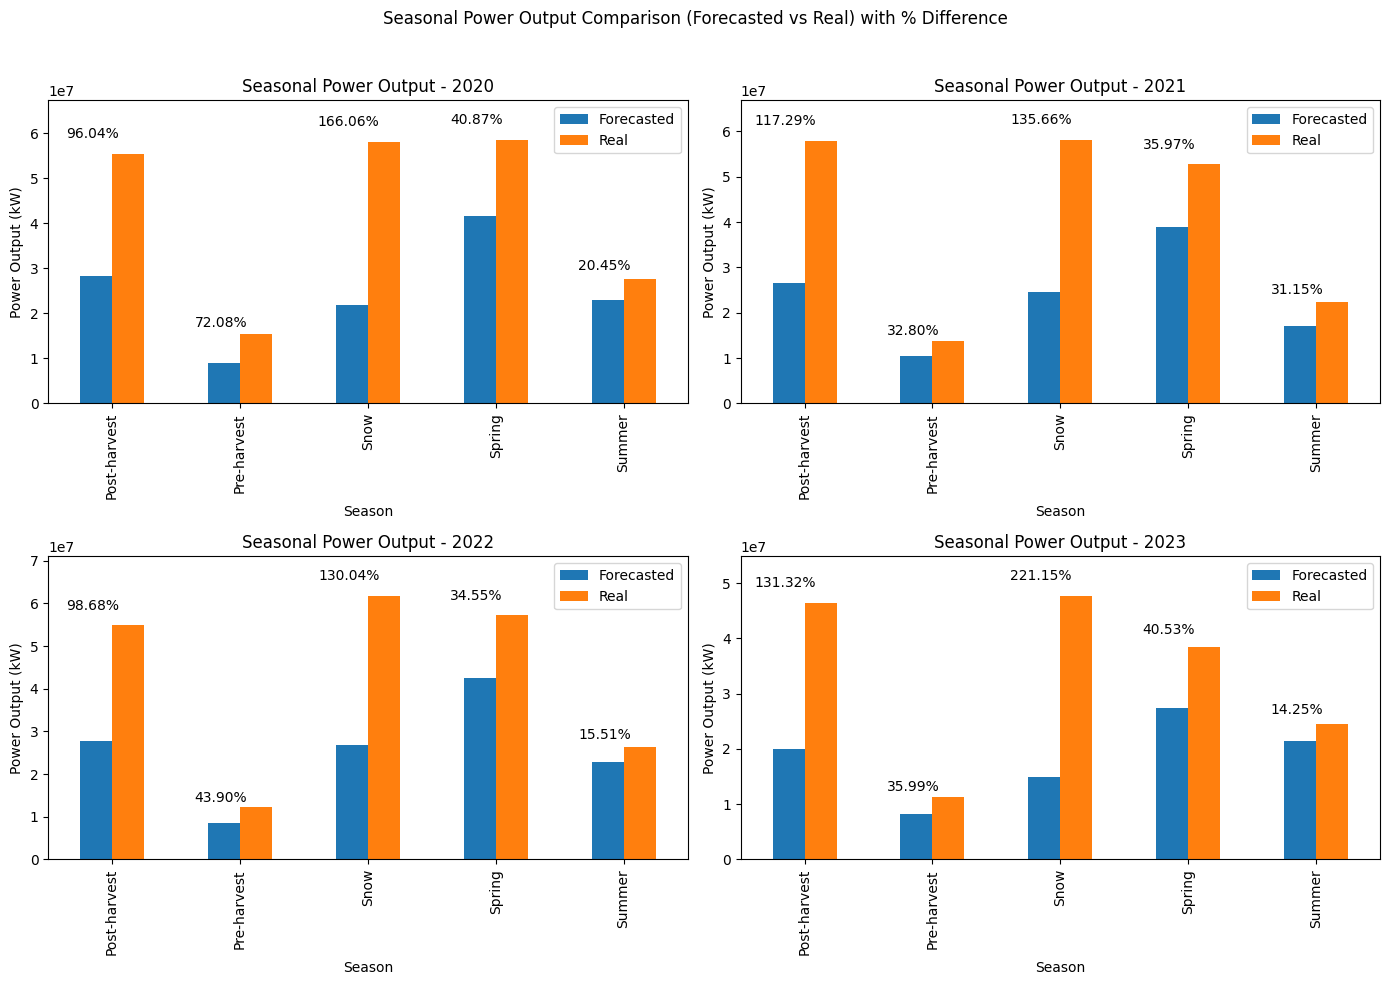

In [1]:
#Ghost_Pine

import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/NEP1 Ghost Pine/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Ghost_Pine'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_NEP1_Ghost_Pine.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Magrath_seasonal_power_output_comparison_with_diff.png


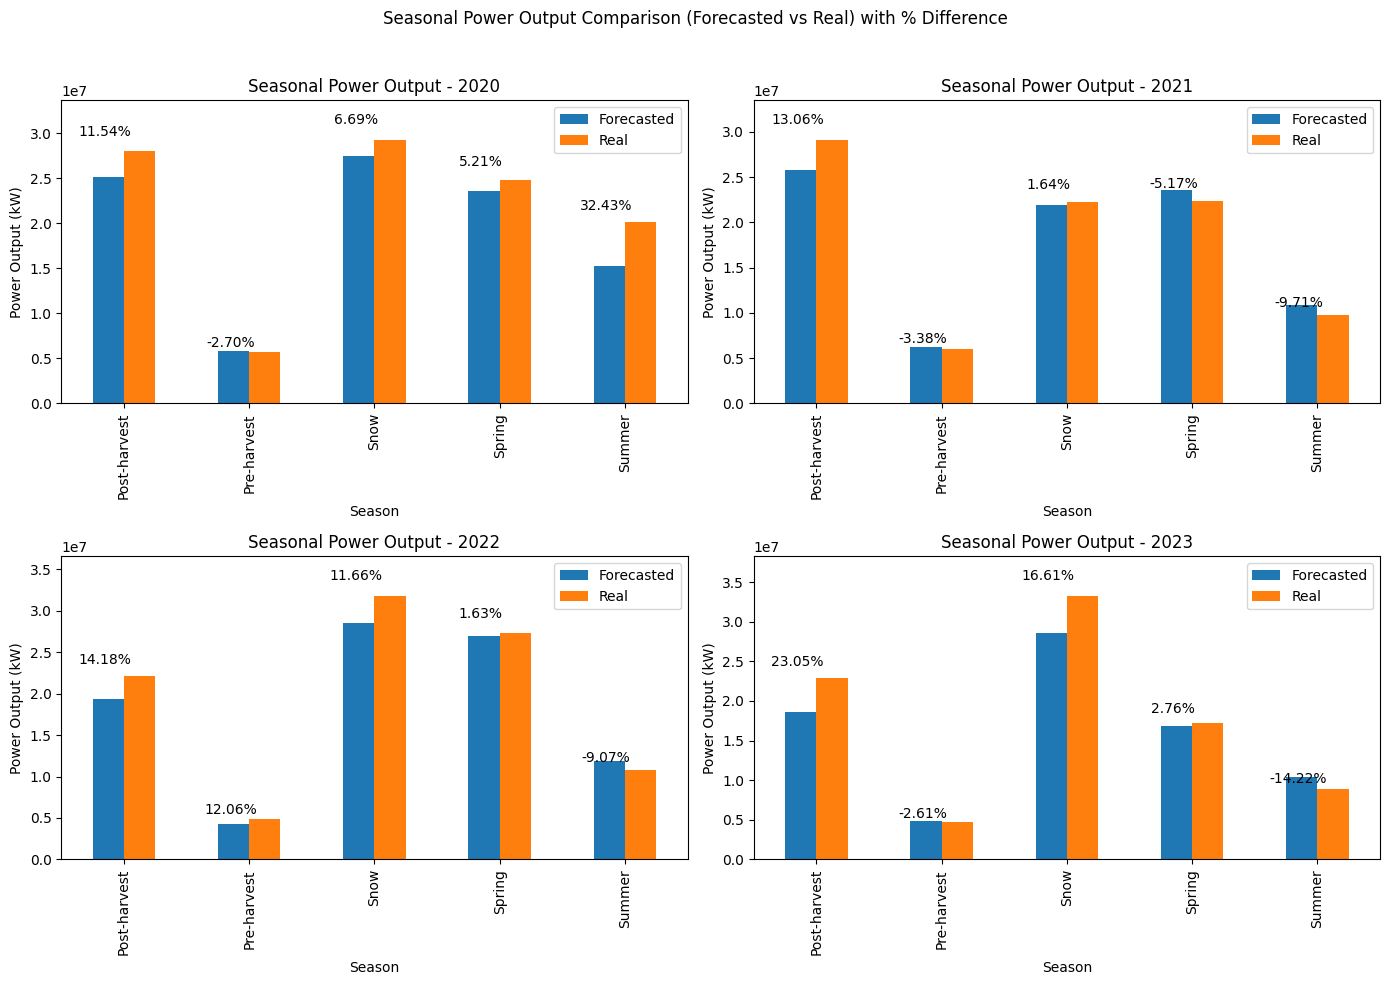

In [2]:
#Magrath

import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/SCR2_Magrath/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Magrath'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_SCR2_Magrath.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Summerview_seasonal_power_output_comparison_with_diff.png


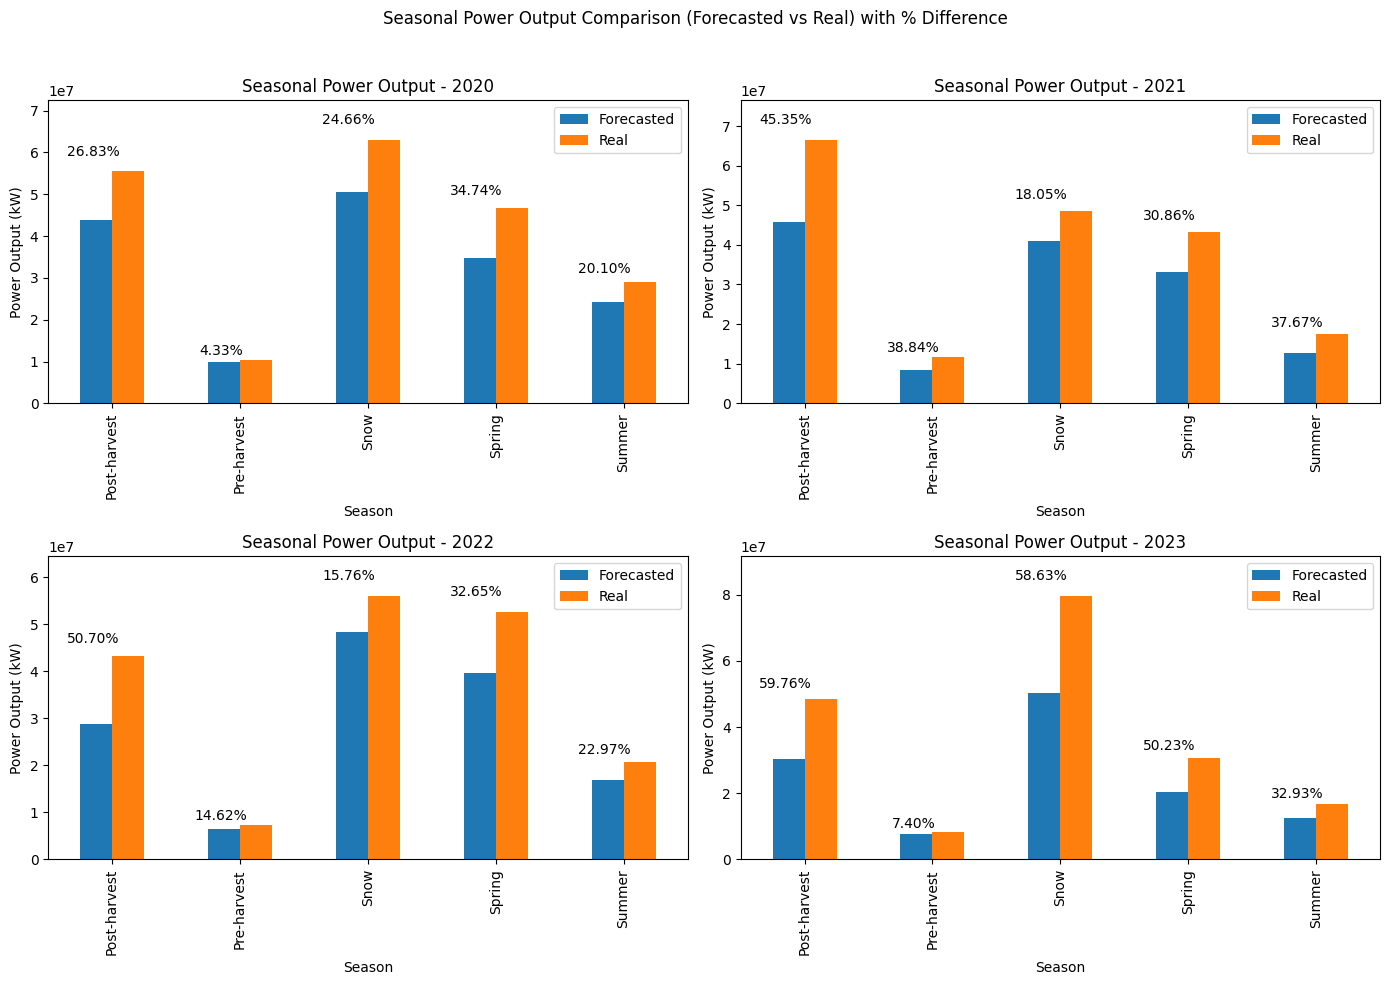

In [3]:
#Summerview

import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/Summerview/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Summerview'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_IEW1_Summerview_Phase_1.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/McBride_Lake_Windfarm_seasonal_power_output_comparison_with_diff.png


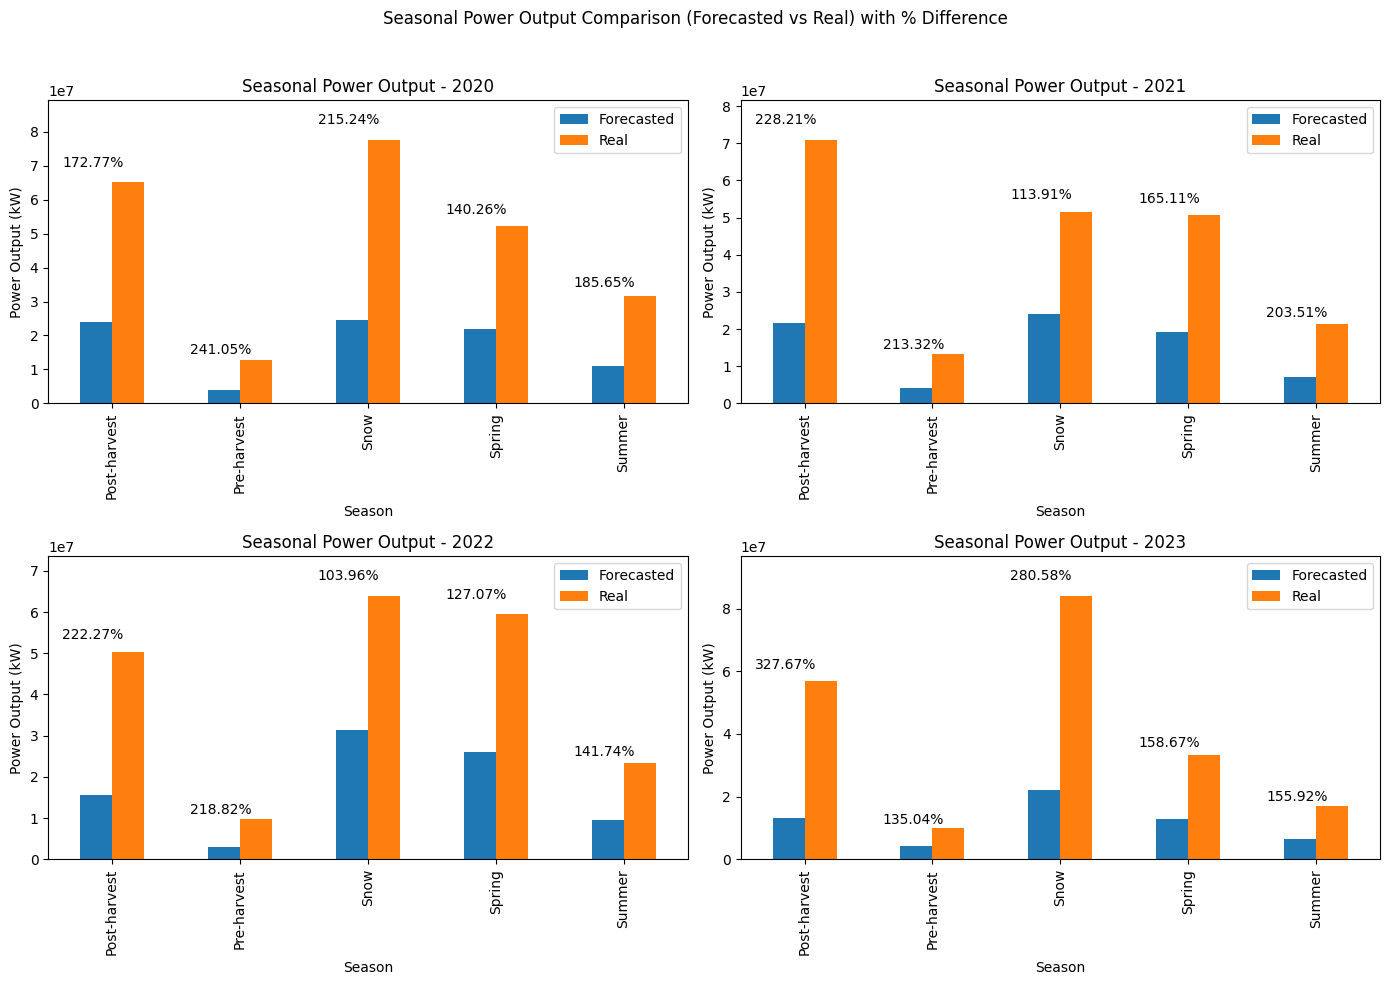

In [4]:
#McBride_Lake_Windfarm

import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/AKE1 McBride Lake Windfarm/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'McBride_Lake_Windfarm'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_AKE1_McBride_Lake_Windfarm.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Ardenville_seasonal_power_output_comparison_with_diff.png


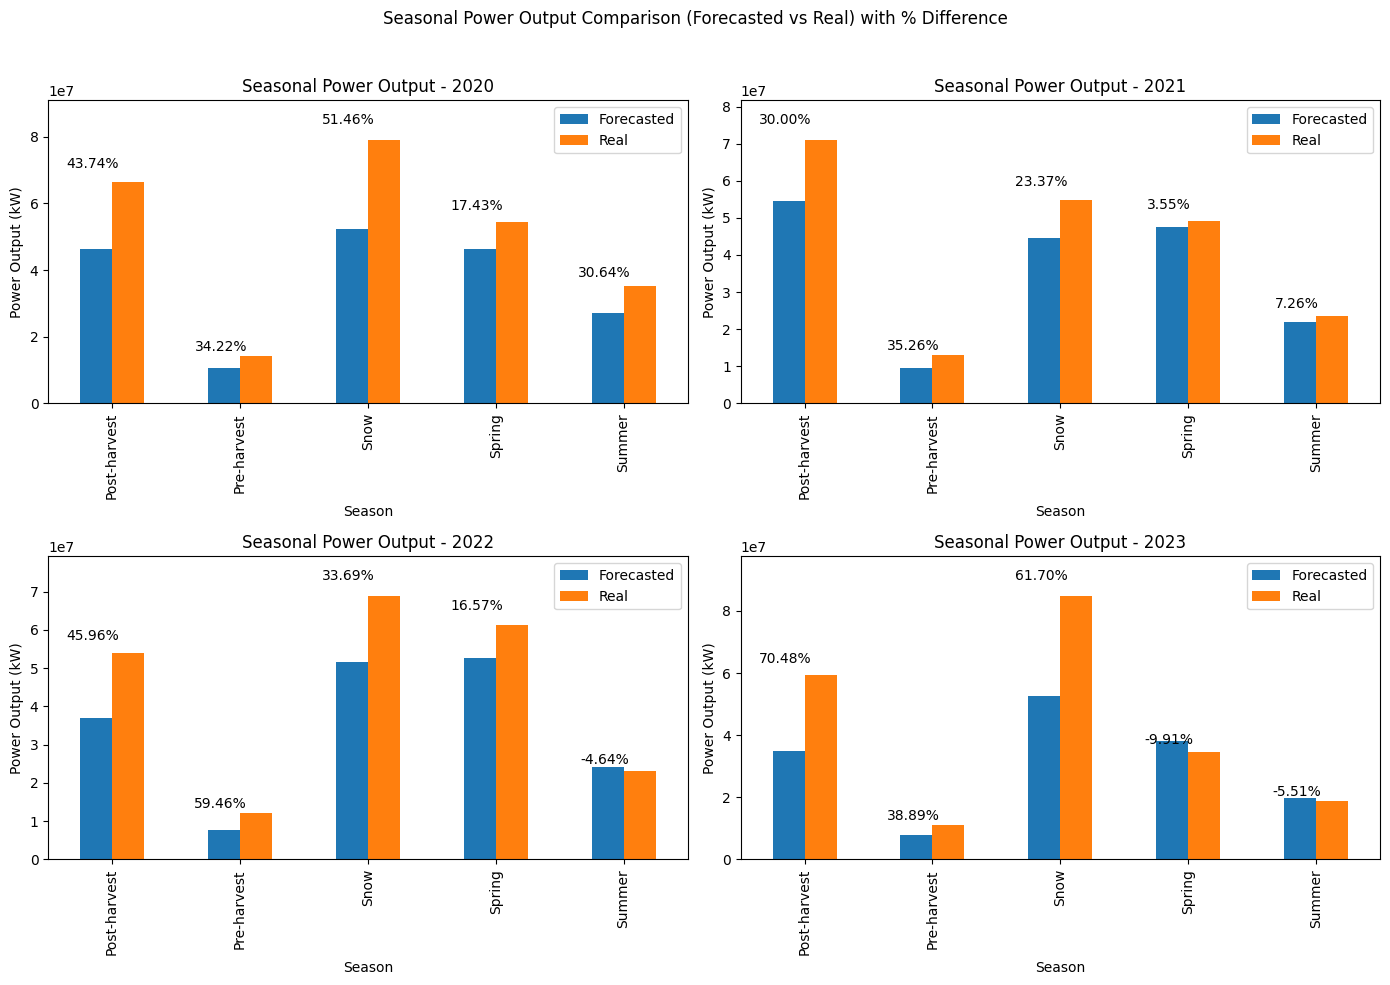

In [5]:
#Ardenville


import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/ARD1 Ardenville/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Ardenville'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_ARD1_Ardenville.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Blue_Trail_Wind_seasonal_power_output_comparison_with_diff.png


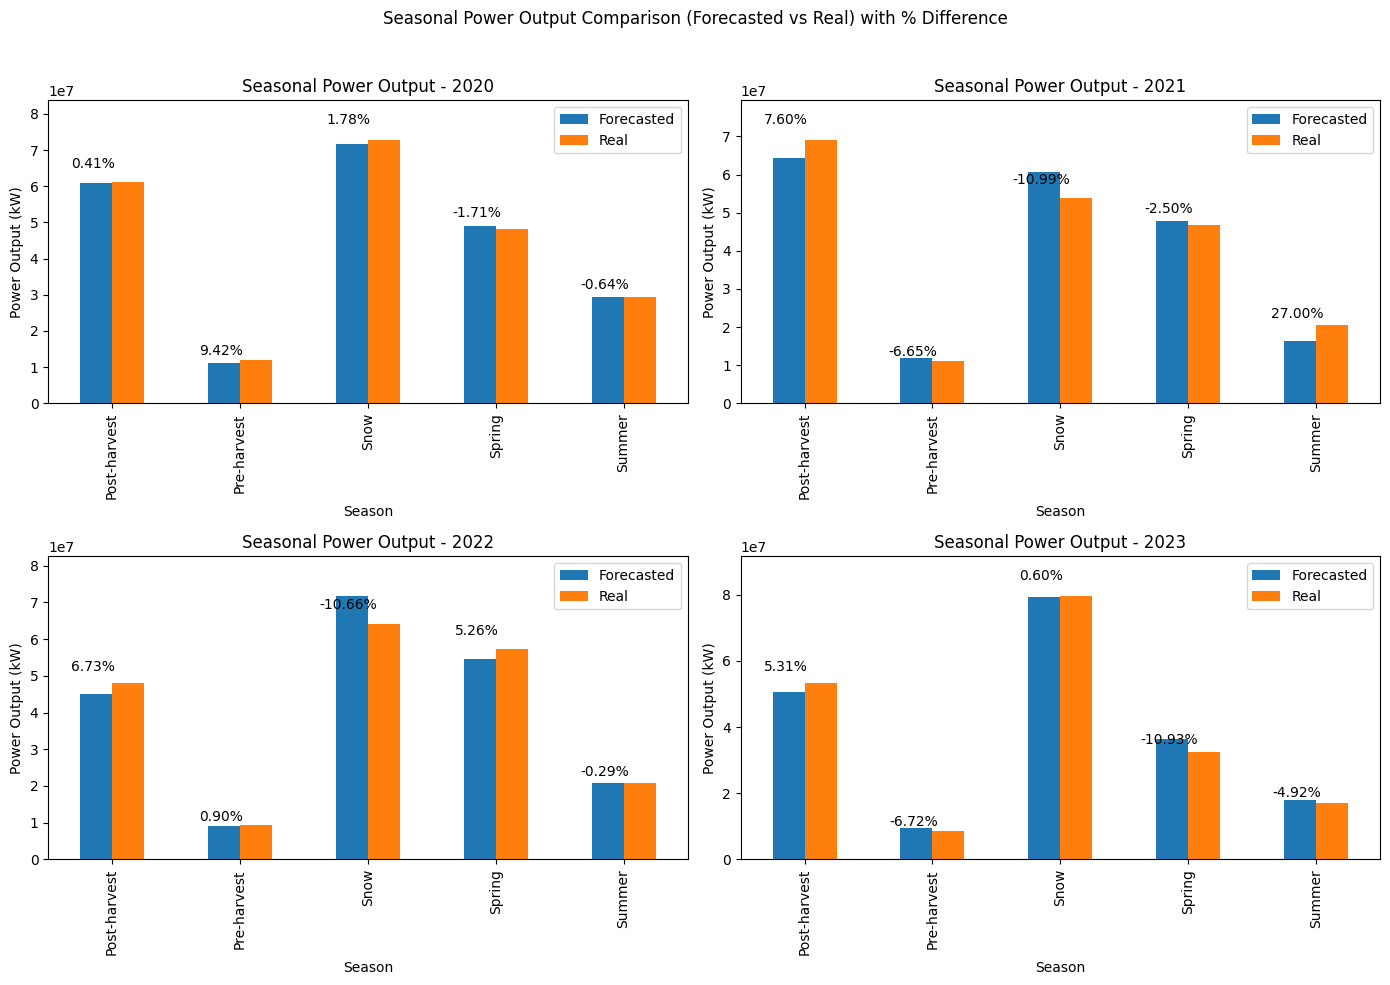

In [6]:
#Blue_Trail_Wind


import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/BTR1 Blue Trail Wind/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Blue_Trail_Wind'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_BTR1_Blue_Trail_Wind.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/ARM2262_Castle_River_seasonal_power_output_comparison_with_diff.png


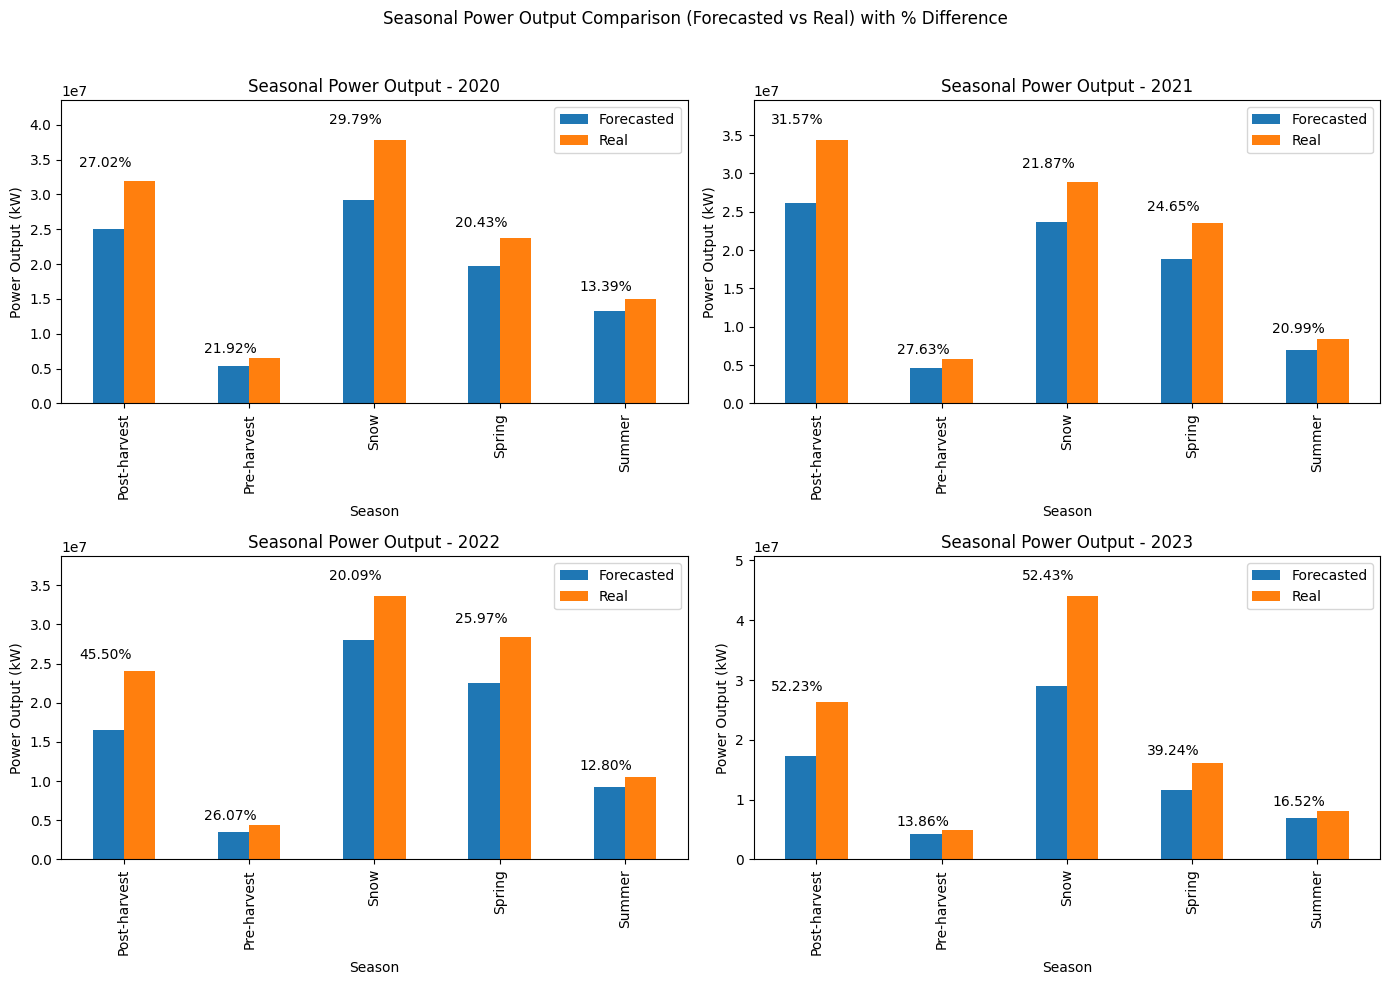

In [7]:
#ARM2262_Castle_River


import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/CR1 ARM2262 Castle River/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'ARM2262_Castle_River'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_CR1_ARM2262_Castle_River.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Cowley_Ridge_seasonal_power_output_comparison_with_diff.png


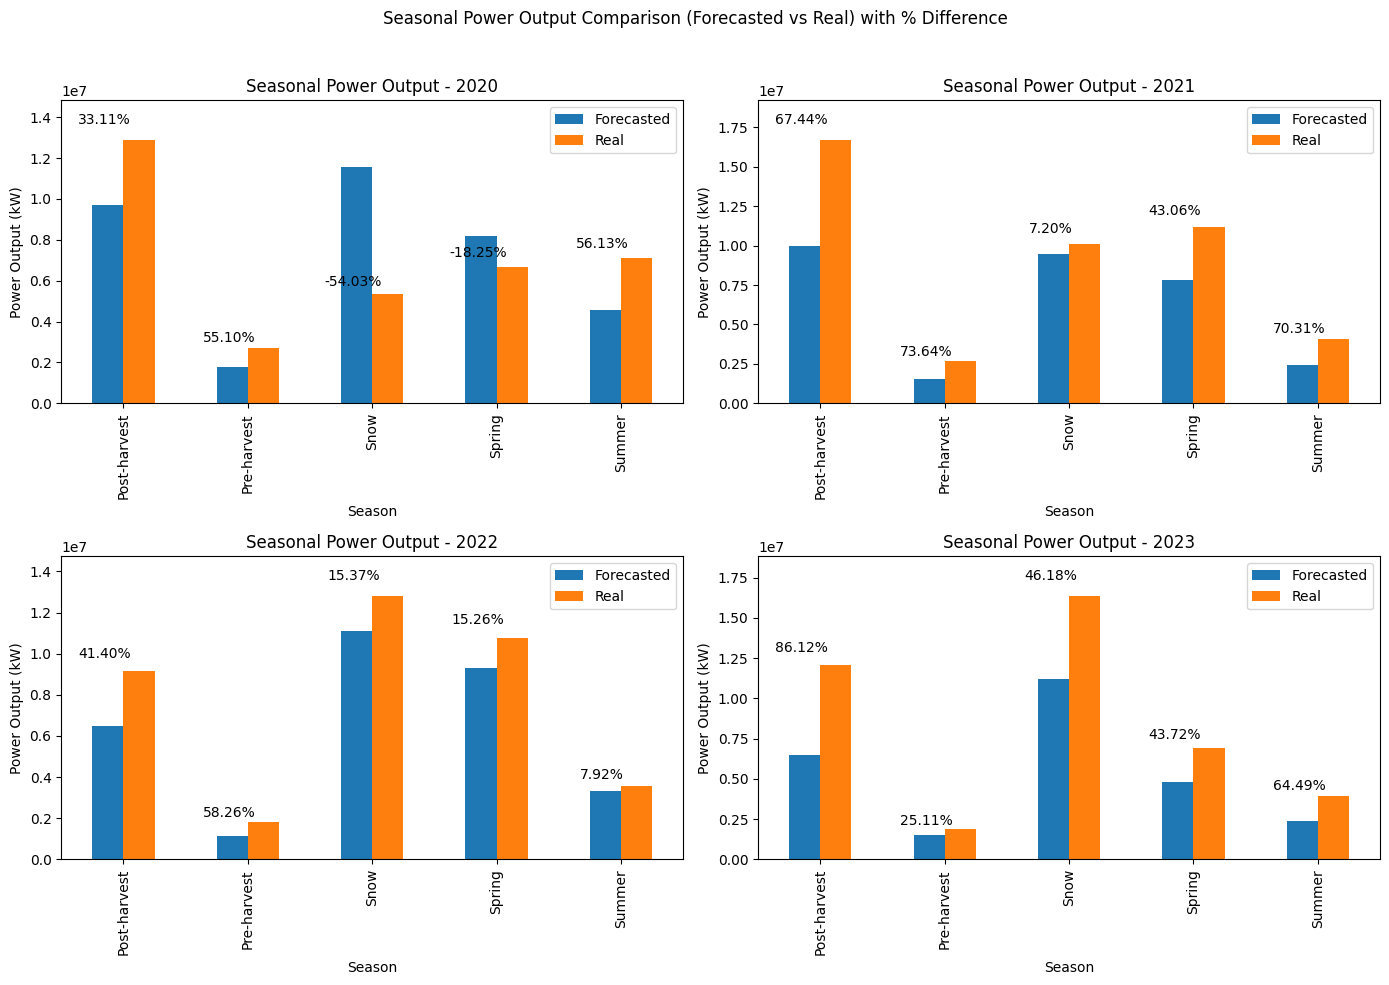

In [8]:
#Cowley_Ridge

import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/Cowley Ridge/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Cowley_Ridge'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_Cowley_Ridge.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Enel_Alberta_Castle_Rock_Wind_Farm_seasonal_power_output_comparison_with_diff.png


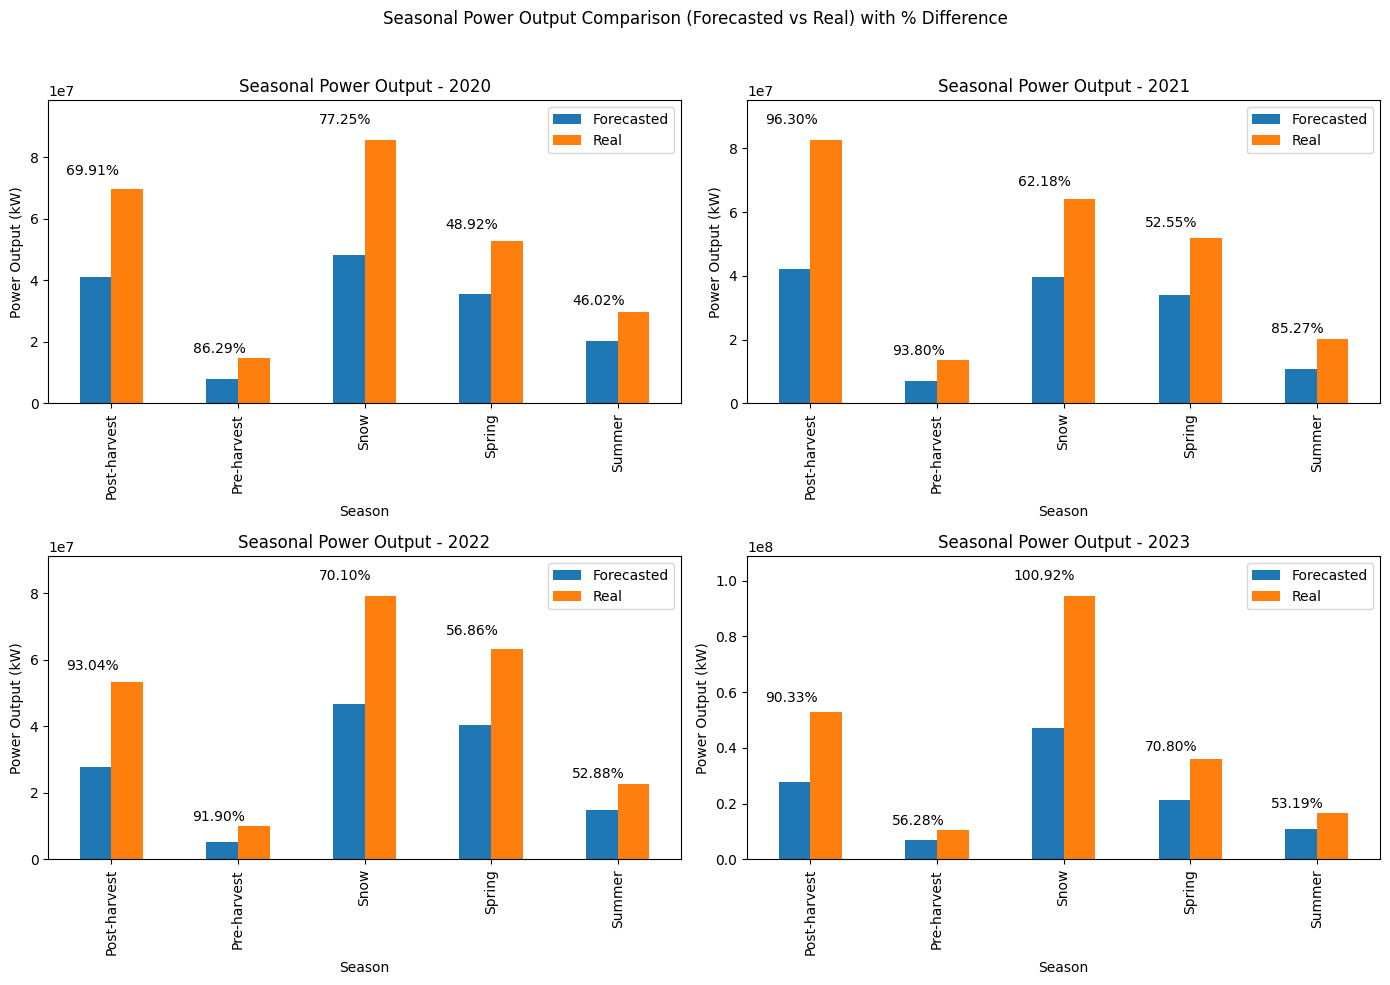

In [10]:
#Enel_Alberta_Castle_Rock_Wind_Farm

import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/CRR1 Enel Alberta Castle Rock Wind Farm/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Enel_Alberta_Castle_Rock_Wind_Farm'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_CRR1_Enel_Alberta_Castle_Rock_Wind_Farm.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Halkirk_Wind_Power_Facility_seasonal_power_output_comparison_with_diff.png


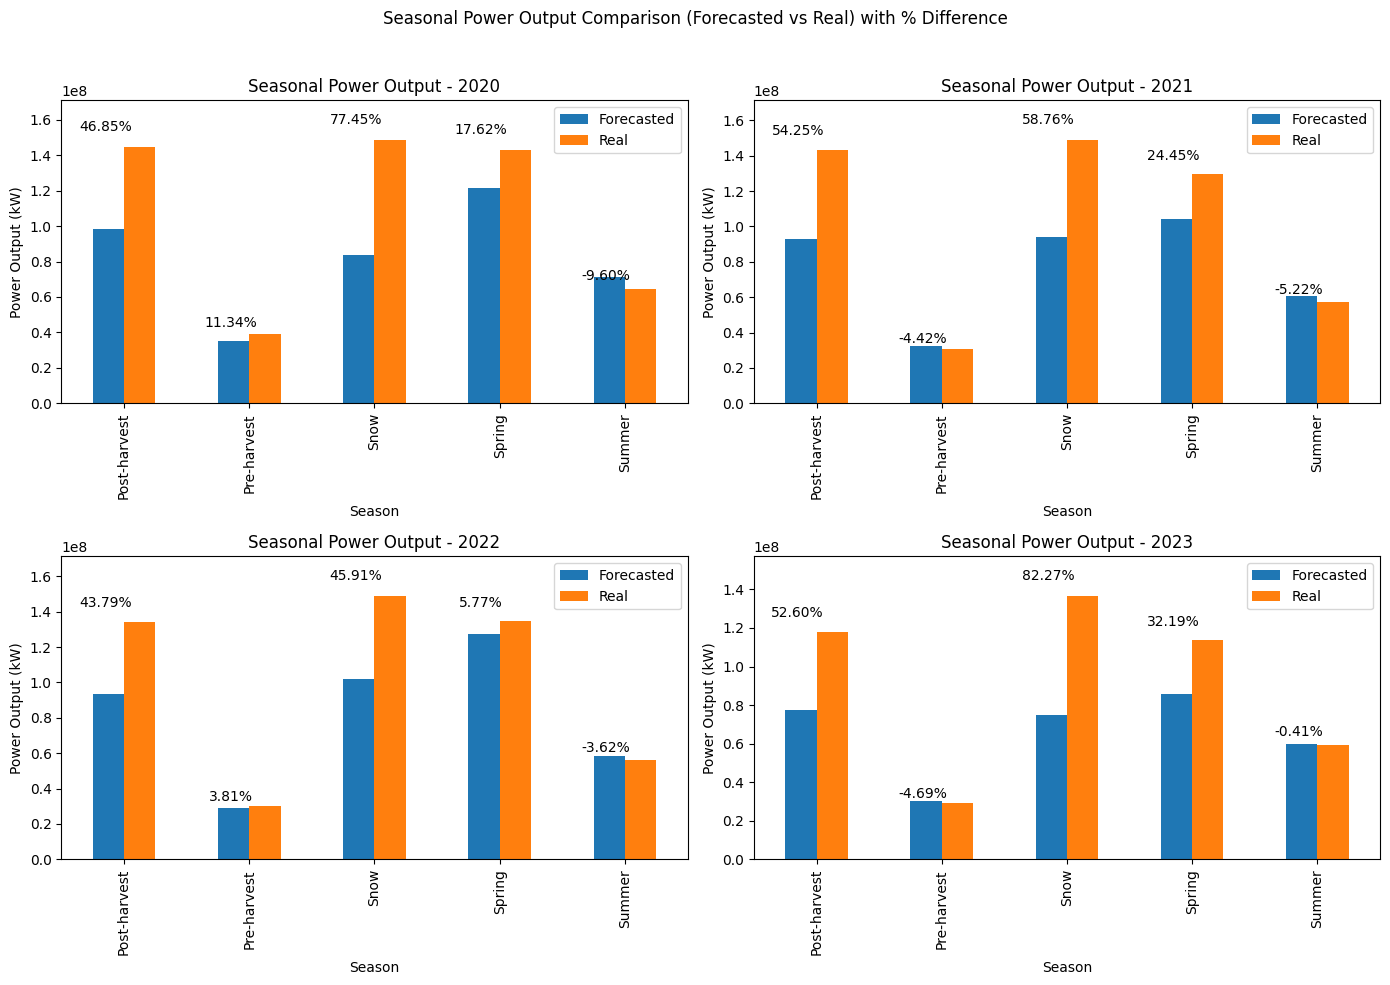

In [11]:
#Halkirk_Wind_Power_Facility


import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/HAL1 Halkirk Wind Power Facility/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Halkirk_Wind_Power_Facility'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_HAL1_Halkirk_Wind_Power_Facility.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Kettles_Hill_Wind_seasonal_power_output_comparison_with_diff.png


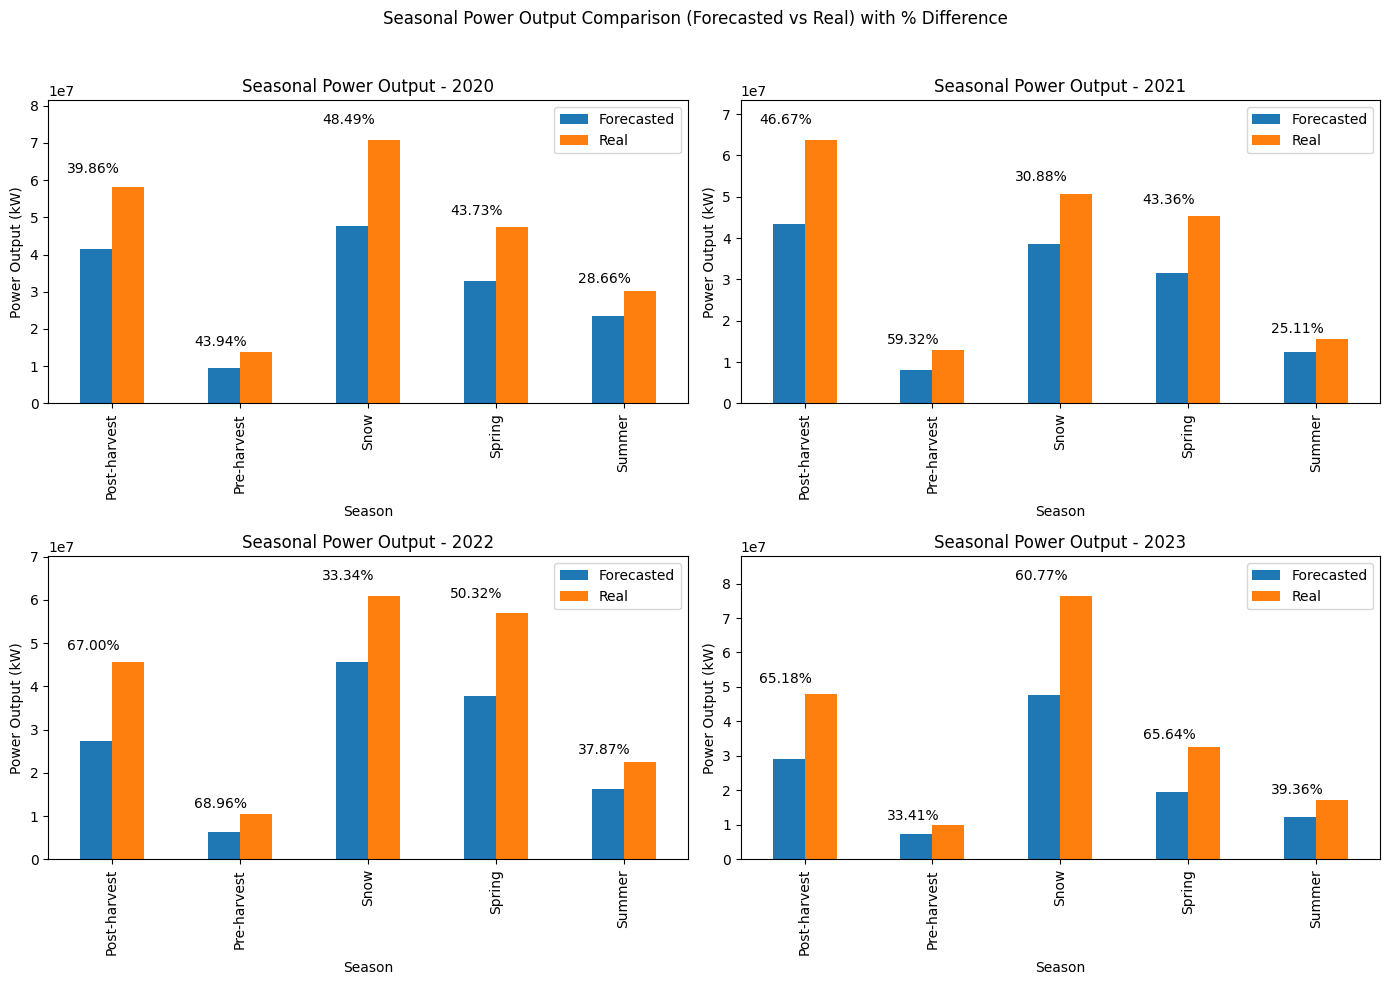

In [12]:
#Kettles_Hill_Wind

import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/KHW1 Kettles Hill Wind/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Kettles_Hill_Wind'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_KHW1_Kettles_Hill_Wind.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Oldman_2_Wind_Farm_seasonal_power_output_comparison_with_diff.png


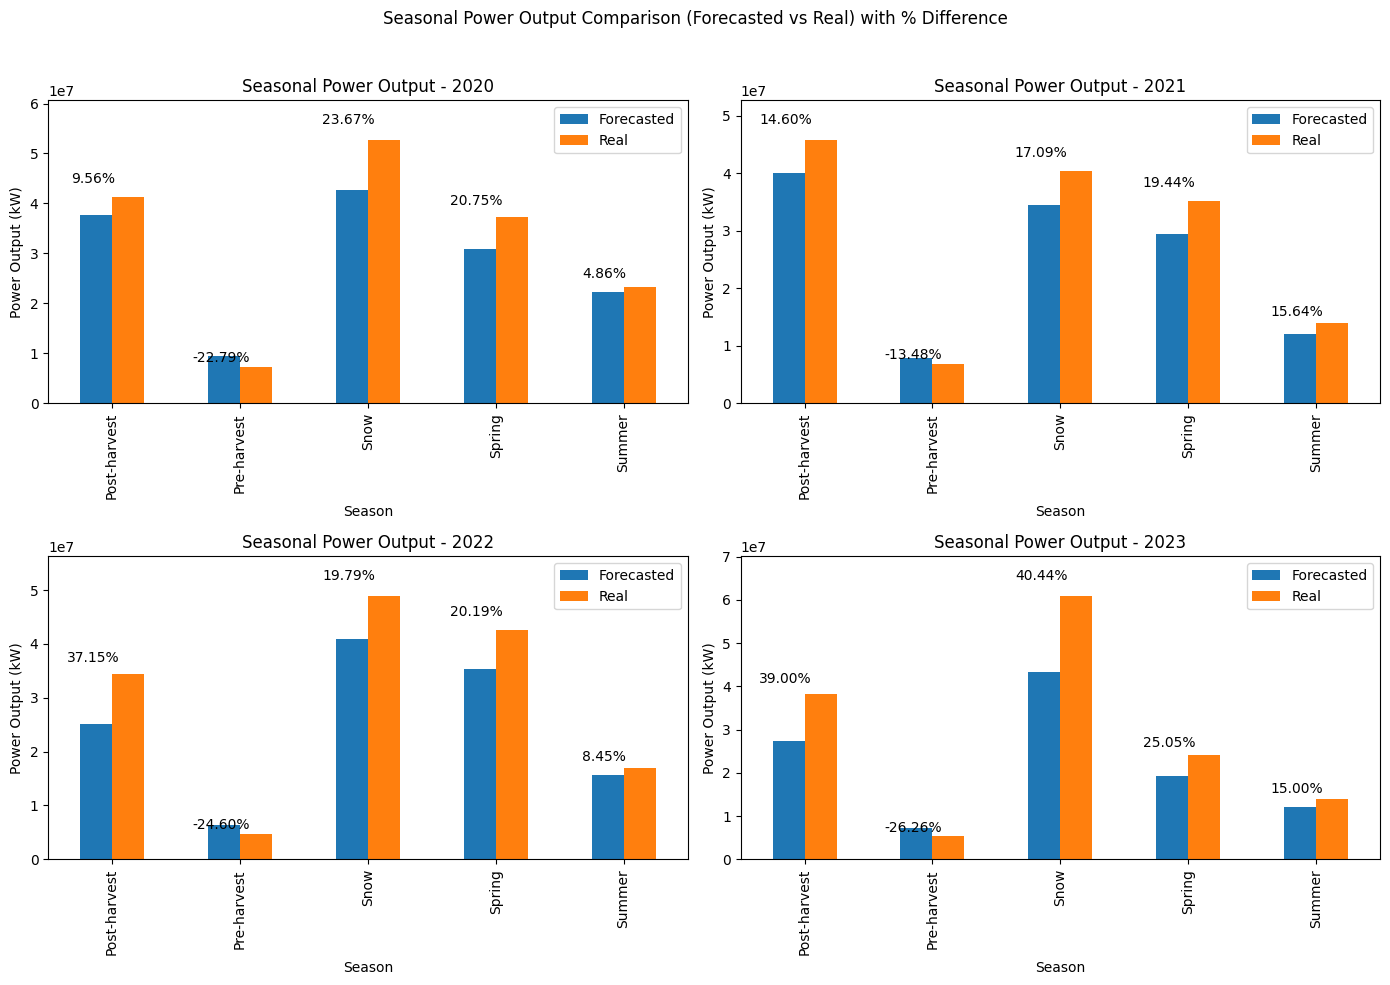

In [13]:
#Oldman_2_Wind_Farm



import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/OWF1 Oldman 2 Wind Farm 1/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Oldman_2_Wind_Farm'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_OWF1_Oldman_2_Wind_Farm_1.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Suncor_Chin_Chute_seasonal_power_output_comparison_with_diff.png


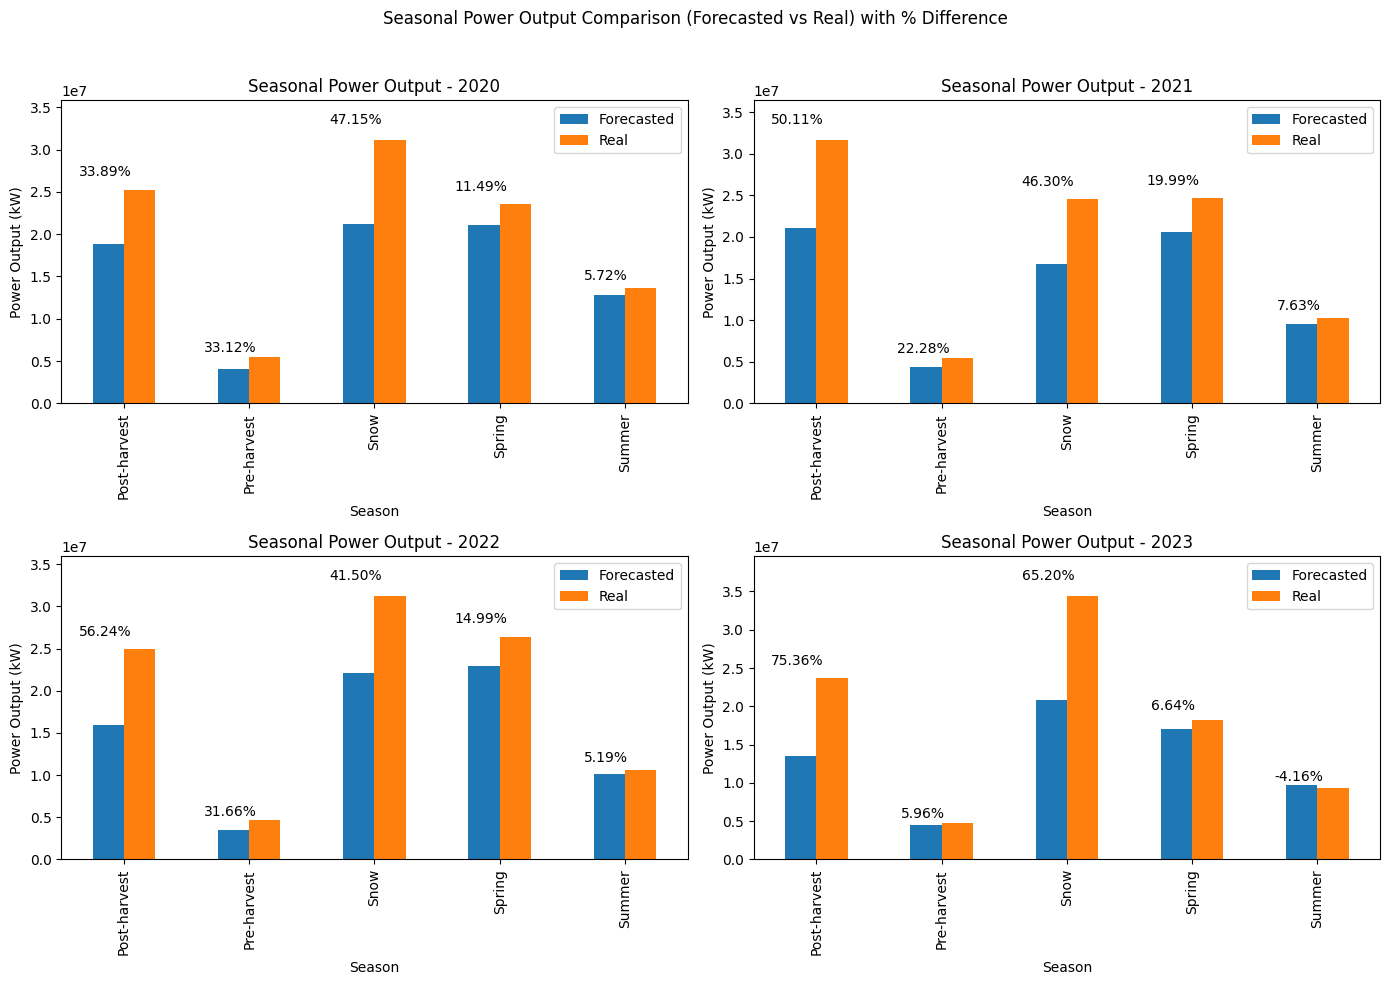

In [14]:
#Suncor_Chin_Chute



import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/SCR3 Suncor Chin Chute/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Suncor_Chin_Chute'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_SCR3_Suncor_Chin_Chute.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Wintering_Hills_seasonal_power_output_comparison_with_diff.png


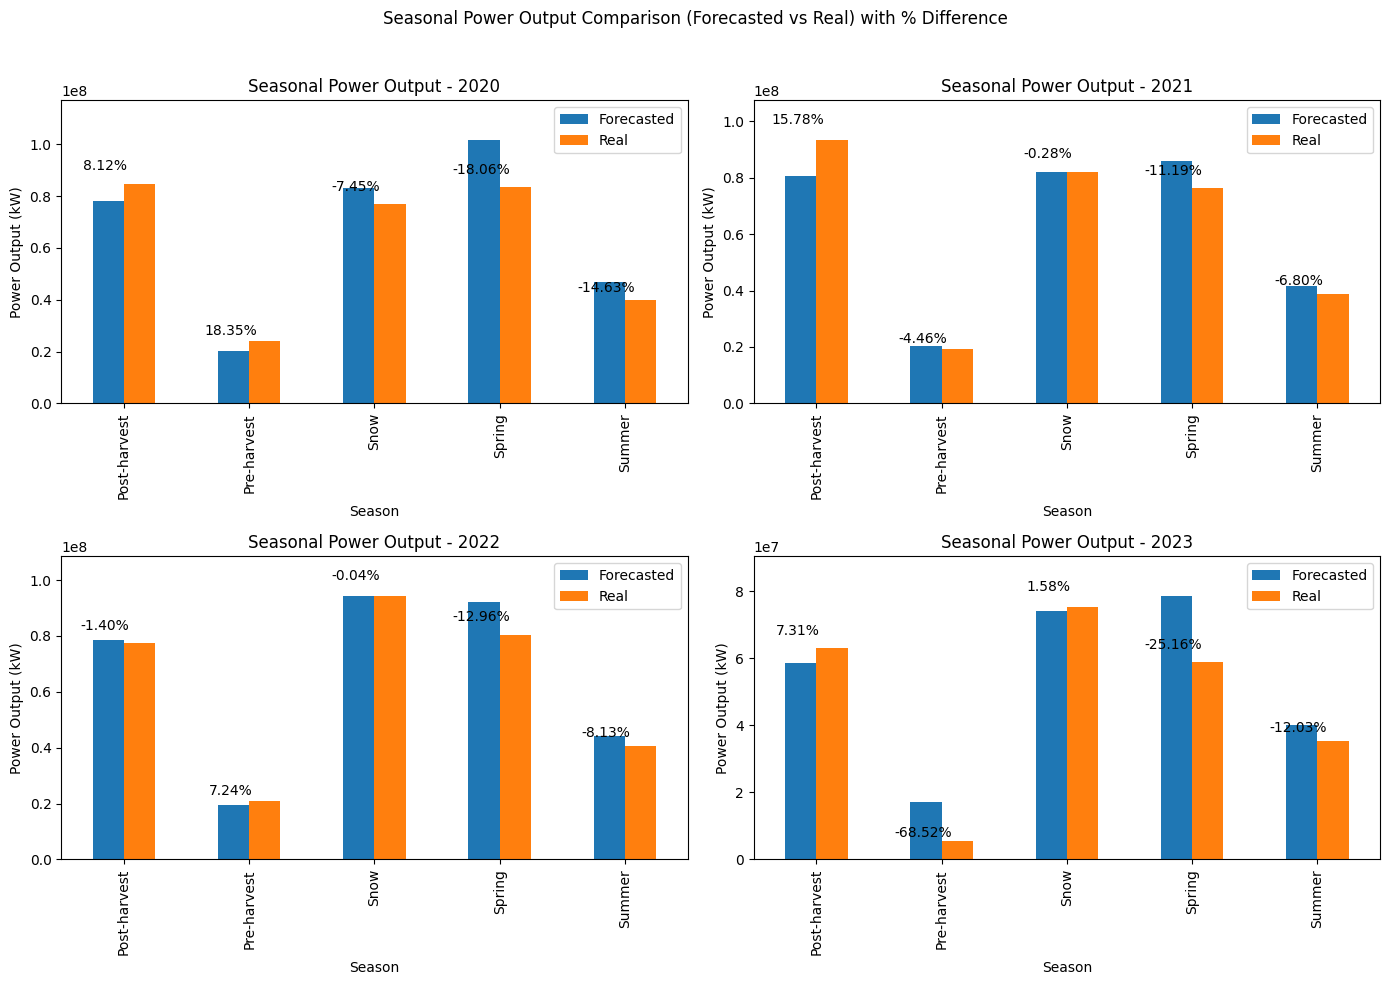

In [15]:
#Wintering_Hills



import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/SCR4 Wintering Hills/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Wintering_Hills'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_SCR4_Wintering_Hills.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")

Plot saved to C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/Enmax_Taber_seasonal_power_output_comparison_with_diff.png


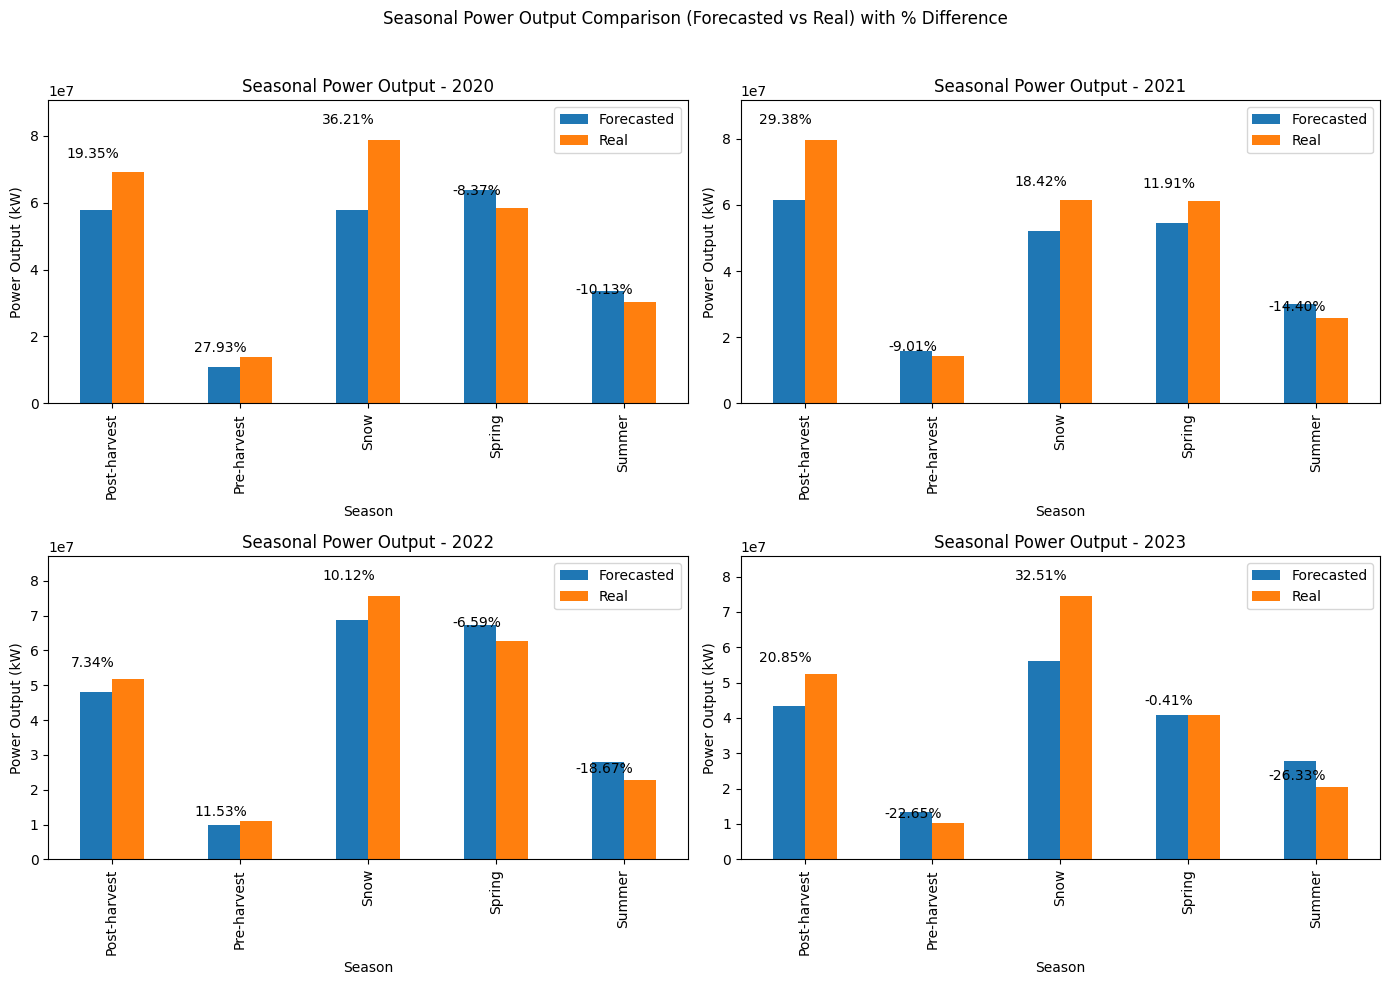

In [16]:
#Enmax_Taber


import pandas as pd
import os
import matplotlib.pyplot as plt
from icecream import ic

# Directory and variable setup
dirOut = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/outputs/"
dirreal = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/real_power/TAB1 Enmax Taber/"
dir_base = "C:/Users/asobchen/AppData/Local/Programs/Python/Python39/alberta/"
stations_path = os.path.join(dir_base, 'Nearby_updated_2.csv')

turbine_name = 'Enmax_Taber'
years = range(2020, 2024)

# Load number of turbines for the given turbine name
wind_turbines = pd.read_csv(stations_path)
number_of_turbines = wind_turbines.loc[
    wind_turbines['Asset Name'].str.contains(turbine_name, case=False), 
    'number_of_turbines'
].values[0]

# Define seasonal mappings
season_mapping = {
    'Summer': [6, 7],
    'Pre-harvest': [8],
    'Post-harvest': [9, 10, 11],
    'Snow': [12, 1, 2],
    'Spring': [3, 4, 5]
}

# Convert month list to a dictionary mapping month to season
month_to_season = {}
for season, months in season_mapping.items():
    for month in months:
        month_to_season[month] = season

# Set up plotting layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Seasonal Power Output Comparison (Forecasted vs Real) with % Difference")

# Process each year
for i, year in enumerate(years):
    # Load forecasted power data
    power = pd.read_csv(os.path.join(dirOut, f"{turbine_name}_{year}_power_output_new.csv"))
    power['time'] = pd.to_datetime(power['time'])
    power['month'] = power['time'].dt.month
    power['season'] = power['month'].map(month_to_season)
    
    # Multiply forecasted power by number of turbines
    power['power_out'] *= number_of_turbines

    # Calculate seasonal sum for forecasted power
    seasonal_power_sum = power.groupby('season')['power_out'].sum()

    # Save forecasted seasonal sum to CSV
    seasonal_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_power_sum.csv"), header=True)

    # Load real power data and calculate real power in kilowatts
    real_power_data = pd.read_csv(os.path.join(dirreal, f"{year}_TAB1_Enmax_Taber.csv"))
    real_power_data['Date (MST)'] = pd.to_datetime(real_power_data['Date (MST)'])
    real_power_data['real_power'] = real_power_data['Volume'] * 1000
    real_power_data['month'] = real_power_data['Date (MST)'].dt.month
    real_power_data['season'] = real_power_data['month'].map(month_to_season)
    
    # Calculate seasonal sum for real power
    seasonal_real_power_sum = real_power_data.groupby('season')['real_power'].sum()
    
    # Save real power seasonal sum to CSV
    seasonal_real_power_sum.to_csv(os.path.join(dirOut, f"{turbine_name}_{year}_seasonal_real_power_sum.csv"), header=True)

    # Combine data for plotting and calculate % difference
    seasonal_comparison = pd.DataFrame({
        'Forecasted': seasonal_power_sum,
        'Real': seasonal_real_power_sum
    })
    seasonal_comparison['% Difference'] = ((seasonal_comparison['Real'] - seasonal_comparison['Forecasted']) / seasonal_comparison['Forecasted']) * 100

     # Plot comparison for the current year
    ax = axs[i // 2, i % 2]
    seasonal_comparison[['Forecasted', 'Real']].plot(kind='bar', ax=ax)
    ax.set_title(f'Seasonal Power Output - {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Power Output (kW)')
    ax.legend(['Forecasted', 'Real'])

    # Calculate the maximum y-value and set y-axis limit with padding
    max_y_value = max(seasonal_comparison[['Forecasted', 'Real']].max())
    ax.set_ylim(0, max_y_value * 1.15)  # Add 15% padding to the top of the y-axis

    # Annotate each bar with % difference
    for j, season in enumerate(seasonal_comparison.index):
        forecasted = seasonal_comparison.loc[season, 'Forecasted']
        real = seasonal_comparison.loc[season, 'Real']
        percent_diff = seasonal_comparison.loc[season, '% Difference']
        # Position annotations at the top of each real bar
        ax.text(j - 0.15, real + (0.05 * real), f"{percent_diff:.2f}%", ha='center', va='bottom', color='black', fontsize=10)

# Finalize layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

# Save the plot to the outputs directory
output_plot_path = os.path.join(dirOut, turbine_name +"_seasonal_power_output_comparison_with_diff.png")
plt.savefig(output_plot_path)

print(f"Plot saved to {output_plot_path}")